# Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import warnings
import os
import matplotlib.pyplot as plt
from arabic_text_normalization import text_normalization
tf.random.set_seed(1)

# Ignore Warnings

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

# Read Data

In [3]:
Corpus = open('Arabic Kids Stories.txt', encoding='utf8').read().split("\n")
Corpus = [text_normalization(text) for text in Corpus]

# Preprocessing Data For Deep Learning Model

In [4]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(Corpus)
all_words = len(tokenizer.word_index) + 1
all_words

10433

# Generate Input Sequences

In [5]:
input_sequence_ = []
for line in Corpus:
    token = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token)):
        n_grams = token[:i+1]
        input_sequence_.append(n_grams)
        
max_length =  max([len(x) for x in input_sequence_])
input_sequence_ = np.array(tf.keras.utils.pad_sequences(input_sequence_, maxlen= max_length, padding='pre'))

In [6]:
max_length

168

# Generate Train And Label Data For Model

In [7]:
train, label = input_sequence_[:,:-1], input_sequence_[:,-1]

# Convert Label Data

In [8]:
label = tf.keras.utils.to_categorical(label, num_classes=all_words)

# Deep Learning Models

In [9]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    patience=3,
    restore_best_weights=True,
)

**1-LSTM**

In [10]:
LSTM = tf.keras.Sequential([
                tf.keras.layers.Embedding(input_dim = all_words, output_dim=100, input_length=max_length-1),
                tf.keras.layers.LSTM(128, return_sequences=True),
                tf.keras.layers.LSTM(64, return_sequences=False),
                tf.keras.layers.Dense(all_words, activation= 'softmax')
                ])     

In [11]:
LSTM.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    optimizer=tf.keras.optimizers.legacy.Adam(), 
    metrics=['accuracy'])

In [12]:
with tf.device('gpu:0'):
    history = LSTM.fit(train, label, epochs=150, callbacks=[early_stop])

Epoch 1/150
1312/1312 [==============================] - 71s 52ms/step - loss: 8.1267 - accuracy: 0.0229
Epoch 2/150
1312/1312 [==============================] - 69s 53ms/step - loss: 7.5844 - accuracy: 0.0284
Epoch 3/150
1312/1312 [==============================] - 71s 54ms/step - loss: 7.3153 - accuracy: 0.0339
Epoch 4/150
1312/1312 [==============================] - 70s 53ms/step - loss: 7.0771 - accuracy: 0.0421
Epoch 5/150
1312/1312 [==============================] - 69s 53ms/step - loss: 6.8604 - accuracy: 0.0505
Epoch 6/150
1312/1312 [==============================] - 70s 53ms/step - loss: 6.6478 - accuracy: 0.0584
Epoch 7/150
1312/1312 [==============================] - 71s 54ms/step - loss: 6.4407 - accuracy: 0.0666
Epoch 8/150
1312/1312 [==============================] - 69s 53ms/step - loss: 6.2415 - accuracy: 0.0752
Epoch 9/150
1312/1312 [==============================] - 68s 52ms/step - loss: 6.0559 - accuracy: 0.0839
Epoch 10/150
1312/1312 [==============================]

In [13]:
accuracy = history.history['accuracy']
loss = history.history['loss']  

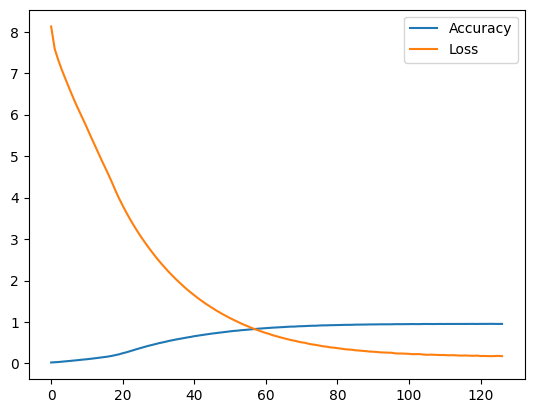

In [14]:
plt.plot(accuracy, label='Accuracy')
plt.plot(loss, label='Loss')
plt.legend()
plt.show()

**2-GRU**

In [15]:
GRU = tf.keras.Sequential([
                tf.keras.layers.Embedding(input_dim = all_words, output_dim=100, input_length=max_length-1),
                tf.keras.layers.GRU(128, return_sequences=False),
                tf.keras.layers.Dense(all_words, activation= 'softmax')
                ])   

In [16]:
GRU.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    optimizer=tf.keras.optimizers.legacy.Adam(), 
    metrics=['accuracy'])

In [17]:
with tf.device('gpu:0'):
    history = GRU.fit(train, label, epochs=150, callbacks=[early_stop])

Epoch 1/150
1312/1312 [==============================] - 68s 50ms/step - loss: 8.0787 - accuracy: 0.0251
Epoch 2/150
1312/1312 [==============================] - 60s 46ms/step - loss: 7.1095 - accuracy: 0.0514
Epoch 3/150
1312/1312 [==============================] - 60s 46ms/step - loss: 6.2893 - accuracy: 0.0838
Epoch 4/150
1312/1312 [==============================] - 60s 46ms/step - loss: 5.5103 - accuracy: 0.1163
Epoch 5/150
1312/1312 [==============================] - 61s 47ms/step - loss: 4.7798 - accuracy: 0.1609
Epoch 6/150
1312/1312 [==============================] - 71s 54ms/step - loss: 4.1024 - accuracy: 0.2352
Epoch 7/150
1312/1312 [==============================] - 91s 70ms/step - loss: 3.4883 - accuracy: 0.3306
Epoch 8/150
1312/1312 [==============================] - 70s 53ms/step - loss: 2.9302 - accuracy: 0.4296
Epoch 9/150
1312/1312 [==============================] - 76s 58ms/step - loss: 2.4463 - accuracy: 0.5165
Epoch 10/150
1312/1312 [==============================]

In [18]:
accuracy = history.history['accuracy']
loss = history.history['loss']  

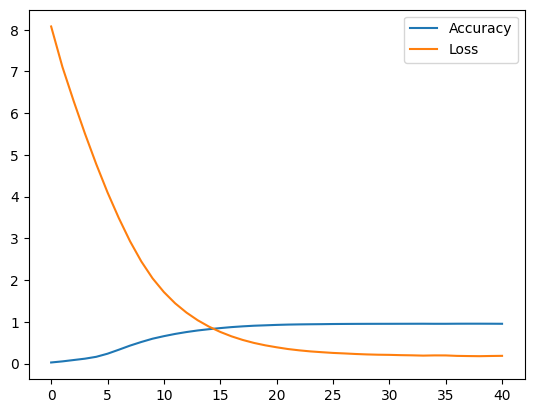

In [19]:
plt.plot(accuracy, label='Accuracy')
plt.plot(loss, label='Loss')
plt.legend()
plt.show()

**3-Bidirectional LSTM**

In [20]:
Bidirectional_LSTM = tf.keras.Sequential([
                tf.keras.layers.Embedding(input_dim = all_words, output_dim=100, input_length=max_length-1),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=False)),
                tf.keras.layers.Dense(all_words, activation= 'softmax')
                ])   

In [21]:
Bidirectional_LSTM.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    optimizer=tf.keras.optimizers.legacy.Adam(), 
    metrics=['accuracy'])

In [22]:
with tf.device('gpu:0'):
    history = Bidirectional_LSTM.fit(train, label, epochs=150, callbacks=[early_stop])

Epoch 1/150
1312/1312 [==============================] - 99s 73ms/step - loss: 8.0708 - accuracy: 0.0253
Epoch 2/150
1312/1312 [==============================] - 86s 66ms/step - loss: 7.2198 - accuracy: 0.0474
Epoch 3/150
1312/1312 [==============================] - 99s 75ms/step - loss: 6.4725 - accuracy: 0.0770
Epoch 4/150
1312/1312 [==============================] - 94s 72ms/step - loss: 5.8066 - accuracy: 0.1035
Epoch 5/150
1312/1312 [==============================] - 92s 70ms/step - loss: 5.1879 - accuracy: 0.1289
Epoch 6/150
1312/1312 [==============================] - 83s 63ms/step - loss: 4.5967 - accuracy: 0.1750
Epoch 7/150
1312/1312 [==============================] - 84s 64ms/step - loss: 4.0435 - accuracy: 0.2434
Epoch 8/150
1312/1312 [==============================] - 91s 69ms/step - loss: 3.5196 - accuracy: 0.3280
Epoch 9/150
1312/1312 [==============================] - 91s 69ms/step - loss: 3.0375 - accuracy: 0.4145
Epoch 10/150
1312/1312 [==============================]

In [23]:
accuracy = history.history['accuracy']
loss = history.history['loss']  

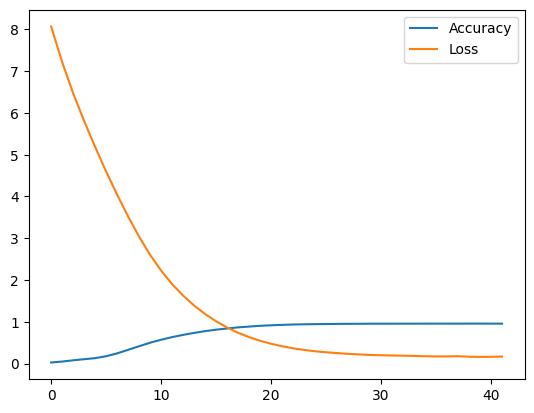

In [24]:
plt.plot(accuracy, label='Accuracy')
plt.plot(loss, label='Loss')
plt.legend()
plt.show()

# Testing The Model

**1-LSTM**

In [25]:
text = "اِبْتَسَمَ الشَّيْخُ الْغَرِيبُ "
number_of_words = 20
for _ in range(number_of_words): 
    token_list = tokenizer.texts_to_sequences([text])[0] 
    token_list = tf.keras.utils.pad_sequences([token_list], maxlen=max_length-1, padding='pre') 
    predicted_probs = LSTM.predict(token_list, verbose=0) 
    word = tokenizer.index_word[np.argmax(predicted_probs)] 
    text += " " + word 
    print(text)
print(" ")
print("Full Generated Text:", text) 

اِبْتَسَمَ الشَّيْخُ الْغَرِيبُ  وَشَكَرَ
اِبْتَسَمَ الشَّيْخُ الْغَرِيبُ  وَشَكَرَ أَبَا
اِبْتَسَمَ الشَّيْخُ الْغَرِيبُ  وَشَكَرَ أَبَا سَعِيدٍ
اِبْتَسَمَ الشَّيْخُ الْغَرِيبُ  وَشَكَرَ أَبَا سَعِيدٍ وَفِي
اِبْتَسَمَ الشَّيْخُ الْغَرِيبُ  وَشَكَرَ أَبَا سَعِيدٍ وَفِي الْيَوْمِ
اِبْتَسَمَ الشَّيْخُ الْغَرِيبُ  وَشَكَرَ أَبَا سَعِيدٍ وَفِي الْيَوْمِ التَّالِي
اِبْتَسَمَ الشَّيْخُ الْغَرِيبُ  وَشَكَرَ أَبَا سَعِيدٍ وَفِي الْيَوْمِ التَّالِي غَادَر
اِبْتَسَمَ الشَّيْخُ الْغَرِيبُ  وَشَكَرَ أَبَا سَعِيدٍ وَفِي الْيَوْمِ التَّالِي غَادَر الشَّيْخُ
اِبْتَسَمَ الشَّيْخُ الْغَرِيبُ  وَشَكَرَ أَبَا سَعِيدٍ وَفِي الْيَوْمِ التَّالِي غَادَر الشَّيْخُ الْغَرِيبُ
اِبْتَسَمَ الشَّيْخُ الْغَرِيبُ  وَشَكَرَ أَبَا سَعِيدٍ وَفِي الْيَوْمِ التَّالِي غَادَر الشَّيْخُ الْغَرِيبُ بَغْدَادَ
اِبْتَسَمَ الشَّيْخُ الْغَرِيبُ  وَشَكَرَ أَبَا سَعِيدٍ وَفِي الْيَوْمِ التَّالِي غَادَر الشَّيْخُ الْغَرِيبُ بَغْدَادَ إِلَى
اِبْتَسَمَ الشَّيْخُ الْغَرِيبُ  وَشَكَرَ أَبَا سَعِيدٍ وَفِي الْيَوْمِ التَّالِي غَادَر الشَّ

**2-GRU**

In [26]:
text = "وَعِنْدَمَا طَلَعَتِ الشَّمْسُ، هَرَبَ الأَعْدَاءُ"
number_of_words = 20
for _ in range(number_of_words): 
    token_list = tokenizer.texts_to_sequences([text])[0] 
    token_list = tf.keras.utils.pad_sequences([token_list], maxlen=max_length-1, padding='pre') 
    predicted_probs = GRU.predict(token_list, verbose=0) 
    word = tokenizer.index_word[np.argmax(predicted_probs)] 
    text += " " + word 
    print(text)
print(" ")
print("Full Generated Text:", text) 

وَعِنْدَمَا طَلَعَتِ الشَّمْسُ، هَرَبَ الأَعْدَاءُ فَأَسْرَعَتْ
وَعِنْدَمَا طَلَعَتِ الشَّمْسُ، هَرَبَ الأَعْدَاءُ فَأَسْرَعَتْ الْأَمِيْرَةُ
وَعِنْدَمَا طَلَعَتِ الشَّمْسُ، هَرَبَ الأَعْدَاءُ فَأَسْرَعَتْ الْأَمِيْرَةُ إلَى
وَعِنْدَمَا طَلَعَتِ الشَّمْسُ، هَرَبَ الأَعْدَاءُ فَأَسْرَعَتْ الْأَمِيْرَةُ إلَى الْقَصْرِ
وَعِنْدَمَا طَلَعَتِ الشَّمْسُ، هَرَبَ الأَعْدَاءُ فَأَسْرَعَتْ الْأَمِيْرَةُ إلَى الْقَصْرِ وَقَدْ
وَعِنْدَمَا طَلَعَتِ الشَّمْسُ، هَرَبَ الأَعْدَاءُ فَأَسْرَعَتْ الْأَمِيْرَةُ إلَى الْقَصْرِ وَقَدْ فَهِمَتْ
وَعِنْدَمَا طَلَعَتِ الشَّمْسُ، هَرَبَ الأَعْدَاءُ فَأَسْرَعَتْ الْأَمِيْرَةُ إلَى الْقَصْرِ وَقَدْ فَهِمَتْ خُطَّةَ
وَعِنْدَمَا طَلَعَتِ الشَّمْسُ، هَرَبَ الأَعْدَاءُ فَأَسْرَعَتْ الْأَمِيْرَةُ إلَى الْقَصْرِ وَقَدْ فَهِمَتْ خُطَّةَ أَخِيْهَا
وَعِنْدَمَا طَلَعَتِ الشَّمْسُ، هَرَبَ الأَعْدَاءُ فَأَسْرَعَتْ الْأَمِيْرَةُ إلَى الْقَصْرِ وَقَدْ فَهِمَتْ خُطَّةَ أَخِيْهَا وَعِنْدَمَا
وَعِنْدَمَا طَلَعَتِ الشَّمْسُ، هَرَبَ الأَعْدَاءُ فَأَسْرَعَتْ الْأَمِيْرَةُ إلَى الْقَصْ

**3-Bidirectional LSTM**

In [34]:
text = "حَبَسَ رَابِيزُو دُمُوعَهُ وَخَرَجَ وَمَعَهُ حِصَانُهُ فَقَطْ"
number_of_words = 35
for _ in range(number_of_words): 
    token_list = tokenizer.texts_to_sequences([text])[0] 
    token_list = tf.keras.utils.pad_sequences([token_list], maxlen=max_length-1, padding='pre') 
    predicted_probs = Bidirectional_LSTM.predict(token_list, verbose=0) 
    word = tokenizer.index_word[np.argmax(predicted_probs)] 
    text += " " + word 
    print(text)
print(" ")
print("Full Generated Text:", text) 

حَبَسَ رَابِيزُو دُمُوعَهُ وَخَرَجَ وَمَعَهُ حِصَانُهُ فَقَطْ ظَلَّ
حَبَسَ رَابِيزُو دُمُوعَهُ وَخَرَجَ وَمَعَهُ حِصَانُهُ فَقَطْ ظَلَّ رَابِيزُو
حَبَسَ رَابِيزُو دُمُوعَهُ وَخَرَجَ وَمَعَهُ حِصَانُهُ فَقَطْ ظَلَّ رَابِيزُو يَمْشِي
حَبَسَ رَابِيزُو دُمُوعَهُ وَخَرَجَ وَمَعَهُ حِصَانُهُ فَقَطْ ظَلَّ رَابِيزُو يَمْشِي طَوِيلًا
حَبَسَ رَابِيزُو دُمُوعَهُ وَخَرَجَ وَمَعَهُ حِصَانُهُ فَقَطْ ظَلَّ رَابِيزُو يَمْشِي طَوِيلًا وَهُوَ
حَبَسَ رَابِيزُو دُمُوعَهُ وَخَرَجَ وَمَعَهُ حِصَانُهُ فَقَطْ ظَلَّ رَابِيزُو يَمْشِي طَوِيلًا وَهُوَ حَزِينٌ
حَبَسَ رَابِيزُو دُمُوعَهُ وَخَرَجَ وَمَعَهُ حِصَانُهُ فَقَطْ ظَلَّ رَابِيزُو يَمْشِي طَوِيلًا وَهُوَ حَزِينٌ جِدًّا
حَبَسَ رَابِيزُو دُمُوعَهُ وَخَرَجَ وَمَعَهُ حِصَانُهُ فَقَطْ ظَلَّ رَابِيزُو يَمْشِي طَوِيلًا وَهُوَ حَزِينٌ جِدًّا كَانَ
حَبَسَ رَابِيزُو دُمُوعَهُ وَخَرَجَ وَمَعَهُ حِصَانُهُ فَقَطْ ظَلَّ رَابِيزُو يَمْشِي طَوِيلًا وَهُوَ حَزِينٌ جِدًّا كَانَ رَابِيزُو
حَبَسَ رَابِيزُو دُمُوعَهُ وَخَرَجَ وَمَعَهُ حِصَانُهُ فَقَطْ ظَلَّ رَابِيزُو يَمْشِي طَ

# Save The Models

In [28]:
LSTM.save('Arabic_LSTM.h5')

In [29]:
Bidirectional_LSTM.save('Arabic_Bidirectional_LSTM.h5')

In [30]:
GRU.save('Arabic_GRU.h5')

# Save The Tokenizer

In [31]:
import pickle
with open('arabic_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)